# Heart disease prediction model based on physical features of a person

### This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Creators: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.**

**Attribute Information**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Original Source:  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Dataset

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Data Visualisation

<AxesSubplot:xlabel='target', ylabel='count'>

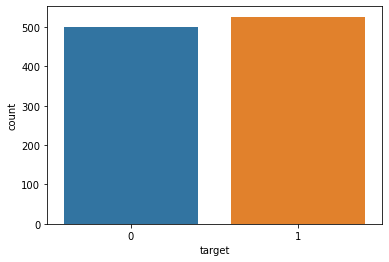

In [7]:
# Creating a bar plot that shows the total counts per target value.
sns.countplot(x='target',data=df)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

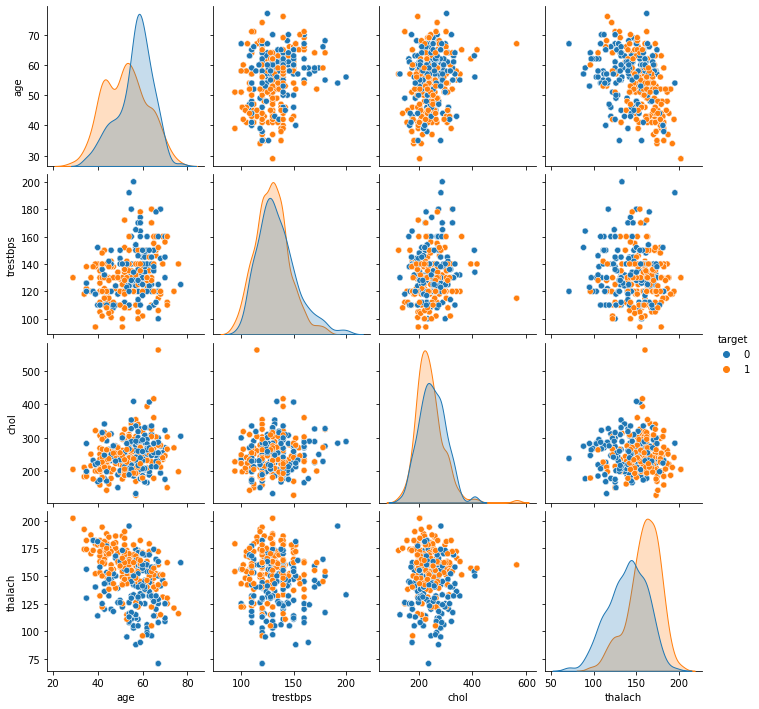

In [9]:
# Creating a pairplot to show the realtionship between these columns.
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

### Creating a heatmap that displays the correlation between all the columns.

<AxesSubplot:>

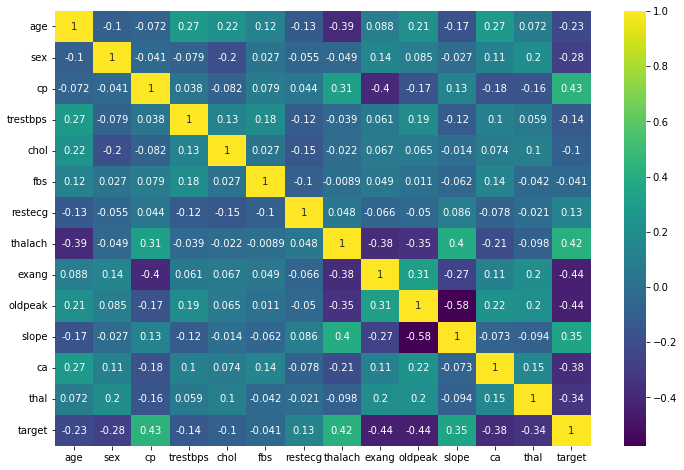

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## Train | Test Split and Scaling

### Separating the features from the labels into 2 objects, X and y.

In [11]:
X = df.drop('target',axis=1)
y = df['target']

### Perform a train test split on the data, with the test size of 10% and a random_state of 101.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Creating a StandardScaler object and normalize the X train and test set feature data.

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

### Creating a Logistic Regression model and using Cross-Validation to find a well-performing C value for the hyper-parameter search.

In [16]:
from sklearn.linear_model import LogisticRegressionCV 

In [17]:
log_model = LogisticRegressionCV()

In [18]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

### Reporting back search's optimal parameters, specifically the C value.

In [19]:
log_model.C_

array([0.00599484])

In [20]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffiecients

In [21]:
log_model.coef_

array([[-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
        -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
         0.20479911, -0.32049603, -0.25727105]])

### Creating a visualization of the coefficients by using a barplot of their values.

In [22]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [23]:
coefs = coefs.sort_values()

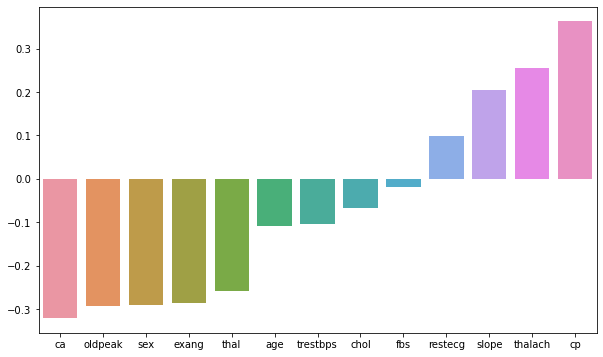

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

##  Model Performance Evaluation on Test Set.

**Creating the following evaluations:**
1. Confusion Matrix Array
2. Confusion Matrix Plot
3. Classification Report

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [ 5, 48]], dtype=int64)

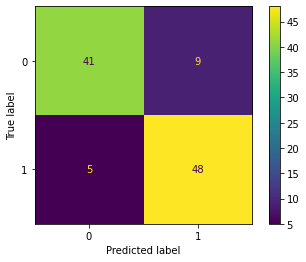

In [28]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



##  Performance Curves

### Creating both the Precision recall curve and the ROC Curve

In [30]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

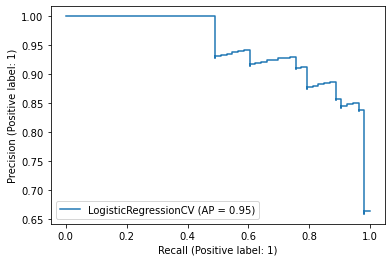

In [31]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

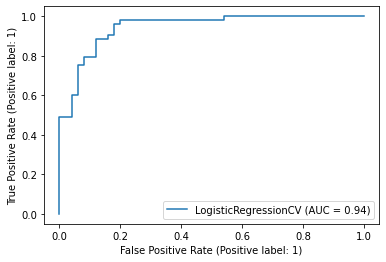

In [32]:
plot_roc_curve(log_model,scaled_X_test,y_test)